# LDA

#### 과제 1: 
붓꽃 데이터 셋에 LDA 방식을 적용하여 표준화 및 학습 후 2개의 components로 시각화하기

In [30]:
# 사이킷런의 LDA를 LinearDiscriminantAnalysis 클래스로 제공
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

### 붓꽃 데이터로 실습

#### 데이터 불러오기

In [36]:
# 붓꽃 데이터 불러오기
iris = load_iris()

#### 정규화

In [37]:
# 표준정규분포로 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

#### LDA 변환

In [38]:
# 2개의 컴포넌트로 LDA변환
## 컴포넌트 개수는 2개
lda = LinearDiscriminantAnalysis(n_components = 2)

## 변환 시, 클래스의 결정값이 필요함 -> iris.target이 클래스의 결정값이 됨
lda.fit(iris_scaled, iris.target)     

## LDA 변환
iris_lda = lda.transform(iris_scaled)    
print(iris_lda)

[[ 8.06179978e+00  3.00420621e-01]
 [ 7.12868772e+00 -7.86660426e-01]
 [ 7.48982797e+00 -2.65384488e-01]
 [ 6.81320057e+00 -6.70631068e-01]
 [ 8.13230933e+00  5.14462530e-01]
 [ 7.70194674e+00  1.46172097e+00]
 [ 7.21261762e+00  3.55836209e-01]
 [ 7.60529355e+00 -1.16338380e-02]
 [ 6.56055159e+00 -1.01516362e+00]
 [ 7.34305989e+00 -9.47319209e-01]
 [ 8.39738652e+00  6.47363392e-01]
 [ 7.21929685e+00 -1.09646389e-01]
 [ 7.32679599e+00 -1.07298943e+00]
 [ 7.57247066e+00 -8.05464137e-01]
 [ 9.84984300e+00  1.58593698e+00]
 [ 9.15823890e+00  2.73759647e+00]
 [ 8.58243141e+00  1.83448945e+00]
 [ 7.78075375e+00  5.84339407e-01]
 [ 8.07835876e+00  9.68580703e-01]
 [ 8.02097451e+00  1.14050366e+00]
 [ 7.49680227e+00 -1.88377220e-01]
 [ 7.58648117e+00  1.20797032e+00]
 [ 8.68104293e+00  8.77590154e-01]
 [ 6.25140358e+00  4.39696367e-01]
 [ 6.55893336e+00 -3.89222752e-01]
 [ 6.77138315e+00 -9.70634453e-01]
 [ 6.82308032e+00  4.63011612e-01]
 [ 7.92461638e+00  2.09638715e-01]
 [ 7.99129024e+00  8

#### 시각화

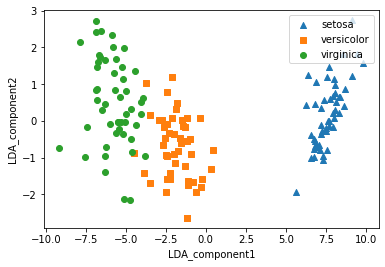

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 스케일링한 데이터로 데이터프레임 생성
lda_columns = ['LDA_component1','LDA_component2']
iris_df = pd.DataFrame(iris_lda, columns = lda_columns)

# target 컬럼 추가
iris_df['target'] = iris.target


# setosa의 target 값은 0, versicolor: 1, virginica: 2
# setosa는 세모,  versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['LDA_component1']
    y = iris_df[iris_df['target'] == i]['LDA_component2']
    plt.scatter(x, y, marker = marker, label = iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('LDA_component1')
plt.ylabel('LDA_component2')

plt.show()

# SVD

<img src = 'SVD.jpg' STYLE = 'width: 500px;'>

#### 임의의 4X4 행렬 생성

In [50]:
import numpy as np

np.random.seed(121)

# 표준정규분포를 따르는 인자를 가진 4행 4열의 행렬 생성
a = np.random.randn(4,4)

print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


#### 특이벡터 및 시그마행렬 구하기

In [51]:
from numpy.linalg import svd

# U, V는 특이벡터이며, 직교 성질을 가짐
## 직교: 전치벡터와 내적 시 단위행렬이 됨
U, Sigma, Vt = svd(a)

print(np.round(U,3), '\n\n', np.round(Sigma,3), '\n\n', np.round(Vt,3))

[[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

 [3.423 2.023 0.463 0.079] 

 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


#### 원래 행렬 복원

In [52]:
# 시그마행렬은 대각행렬로 변환 후에 내적해야함

np.dot(np.dot(U, np.diag(Sigma)),Vt )

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

### 행 간 의존성 부여

In [53]:
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

#### 의존성 부여

In [54]:
print(a[2],'\n')

# 3행이 1행 + 2행이 되도록
a[2] = a[0] + a[1]
print(a[2],'\n')


print(a[3],'\n')
# 4행은 1행과 같도록
a[3] = a[0]
print(a[3],'\n')

a

[-0.01411931  0.6296418   1.70964074 -1.32698736] 

[-0.54214372  0.8987654   1.04147472 -0.0732477 ] 

[ 0.40187312 -0.19142667  1.40382596 -1.96876855] 

[-0.21203317 -0.28492917 -0.57389821 -0.44031017] 



array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

#### 특이벡터 및 시그마행렬 구하기

In [55]:
U, Sigma, Vt = svd(a)
print(np.round(U,3), '\n\n', np.round(Sigma,3), '\n\n', np.round(Vt,3))

[[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]] 

 [2.663 0.807 0.    0.   ] 

 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


- 시그마 대각요소들의 값 중 2개가 0으로 바뀜
- 선형 독립인 로우 벡터 개수가 2개라는 의미임

#### 원래 행렬 복원

In [56]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로, Sigma와 앞 2행에 대응되는 앞 2열만 추출

U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])


# v전치 행렬의 경우는 앞의 2행만 추출
Vt_ = Vt[:2]

print(U_, '\n\n', Sigma_, '\n\n',Vt_)

[[ 0.24568427  0.58278576]
 [-0.77441642 -0.01670951]
 [-0.52873215  0.56607625]
 [ 0.24568427  0.58278576]] 

 [[2.66335286 0.        ]
 [0.         0.80703506]] 

 [[ 0.16449395 -0.57517122 -0.78233269 -0.17342252]
 [-0.67967123  0.19439734 -0.13178782 -0.69490191]]


In [57]:
# 내적 수행
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
a_

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

### Truncated SVD

In [58]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [59]:
# 원본 행렬을 출력
np.random.seed(121)
matrix = np.random.random((6,6))
print(f'원본행렬:\n {matrix}')



# SVD 적용할 경우, U, Sigma, Vt 차원 확인
U, Sigma, Vt = svd(matrix)
print(f'\nU의 차원: {U.shape}, Sigma 차원: {Sigma.shape}, Vt 차원: {Vt.shape}')
print(f'\nSigma값 행렬: {Sigma}')


원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

U의 차원: (6, 6), Sigma 차원: (6,), Vt 차원: (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [60]:
# Truncated SVD의 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, num_components)
print(f'\nTruncated SVD 분해 행렬 차원: {U_tr.shape}')
print(f'Truncated SVD Sigma 차원: {Sigma_tr.shape}')
print(f'Truncated SVD Vt 차원: {Vt_tr.shape}')
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
# 복원
print(f'\nTruncated SVD로 분해 후 복원된 행렬: \n{matrix_tr}')


Truncated SVD 분해 행렬 차원: (6, 4)
Truncated SVD Sigma 차원: (4,)
Truncated SVD Vt 차원: (4, 6)

Truncated SVD로 분해 후 복원된 행렬: 
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


#### 과제 2:
사이킷런 TruncatedSVD 클래스를 이용한 변환을 수행하고 PCA방식과 시각화하여 비교하기

In [61]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
iris

#### 과제 3:
사이킷런 NMF 클래스를 이용한 변환 수행하고 PCA 방식과 시각화하여 비교하기